# Prediksi Intensitas Emosi
### UAS Kapita Selekta Rekayasa Perangkat Lunak dan Data: Data Science
#### Senin, 11 Mei 2020
Nama : Almas Fauzia Wibawa <br>
NIM : 17/409427/PA/17734

Beberapa hal yang akan dilakukan dalam melakukan prediksi intensitas emosi ini:
1. Import data
2. Emotion Density Analysis
3. Text preprocessing
4. Training
5. Testing
6. Evaluasi
7. Analisis
8. Implementasi prediksi

## 1. Import Data
Pada prediksi yang akan dilakukan ini, digunakan data dari task http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html. Data yang digunakan adalah training set, development set, dan test set untuk setiap label, yaitu anger, fear, sadness, dan joy. Training set akan digunakan untuk proses training dan test set akan digunakan untuk proses testing.<br>

Sebelum melakukan langkah lebih lanjut, perlu terlebih dahulu kita masukkan semua data tersebut ke dalam program. Digunakan library pandas untuk mengolah datanya.

In [1]:
import pandas as pd

cols = ['id','text','label','intensity']

anger_train = pd.read_csv('anger-train.txt', header=None, sep="\t", names= cols, index_col=0)
fear_train = pd.read_csv('fear-train.txt', header=None, sep="\t", names= cols, index_col=0)
sad_train = pd.read_csv('sadness-train.txt', header=None, sep="\t", names= cols, index_col=0)
joy_train = pd.read_csv('joy-train.txt', header=None, sep="\t", names= cols, index_col=0)

anger_dev = pd.read_csv('anger-dev.txt', header=None, sep="\t", names= cols, index_col=0)
fear_dev = pd.read_csv('fear-dev.txt', header=None, sep="\t", names= cols, index_col=0)
sad_dev = pd.read_csv('sadness-dev.txt', header=None, sep="\t", names= cols, index_col=0)
joy_dev = pd.read_csv('joy-dev.txt', header=None, sep="\t", names= cols, index_col=0)

anger_test = pd.read_csv('anger-test-int.txt', header=None, sep="\t", names= cols, index_col=0)
fear_test = pd.read_csv('fear-test-int.txt', header=None, sep="\t", names= cols, index_col=0)
sad_test = pd.read_csv('sadness-test-int.txt', header=None, sep="\t", names= cols, index_col=0)
joy_test = pd.read_csv('joy-test-int.txt', header=None, sep="\t", names= cols, index_col=0)

#mereset indeks pada dataframe
anger_test.reset_index(inplace=True)
fear_test.reset_index(inplace=True)
sad_test.reset_index(inplace=True)
joy_test.reset_index(inplace=True)

Karena training set dan development set akan bersama digunakan untuk training, kedua data set tersebut digabung menjadi satu dataframe.

In [2]:
anger = pd.concat([anger_train, anger_dev])
fear = pd.concat([fear_train, fear_dev])
sad = pd.concat([sad_train, sad_dev])
joy = pd.concat([joy_train, joy_dev])

# mereset indeks pada dataframe
anger.reset_index(inplace=True)
fear.reset_index(inplace=True)
sad.reset_index(inplace=True)
joy.reset_index(inplace=True)

## 2. Emotion Density Analysis
Emotion Density Analysis adalah proses analisa emosi pada satu kesatuan data. Oleh karena itu, untuk melakukannya, perlu terlebih dahulu menggabungkan data semua label menjadi satu.

In [3]:
frames = [anger, fear, sad, joy]
data_training = pd.concat(frames)
data_training.reset_index(inplace=True)
print(data_training.head(20))
data_training.label.value_counts()

    index     id                                               text  label  \
0       0  10000  How the fu*k! Who the heck! moved my fridge!.....  anger   
1       1  10001  So my Indian Uber driver just called someone t...  anger   
2       2  10002  @DPD_UK I asked for my parcel to be delivered ...  anger   
3       3  10003  so ef whichever butt wipe pulled the fire alar...  anger   
4       4  10004  Don't join @BTCare they put the phone down on ...  anger   
5       5  10005                                My blood is boiling  anger   
6       6  10006  When you've still got a whole season of Wentwo...  anger   
7       7  10007  @bt_uk why does tracking show my equipment del...  anger   
8       8  10008  @TeamShanny legit why i am so furious with him...  anger   
9       9  10009  How is it suppose to work if you do that? Wtf ...  anger   
10     10  10010  im so mad about power rangers. im incensed. im...  anger   
11     11  10011  Wont use using @mothercareuk @Mothercarehelp a

fear       1257
anger       941
joy         902
sadness     860
Name: label, dtype: int64

Dapat dilihat bahwa setiap label memiliki jumlah training set yang berbeda.<br>

Analisa pertama kali dilakukan adalah dengan menghitung jumlah kata, jumlah karakter, dan jumlah tanda baca. Dalam mengekspresikan emosi, kerap kali digunakan tanda baca sehingga jumlahnya dalam suatu twit perlu diketahui. Sedangkan, jumlah character perlu diketahui untuk mengetahui apakah kadar tanda baca di twit tersebut cukup tinggi. Jumlah kata digunakan untuk memperkirakan bagaimana karakter pada twit tersebut dibentuk.

Jumlah tanda baca yang ada pada twit dalam data set ini ternyata beragam. Yang menjadi pertanyaan selanjutnya adalah apakah tanda baca berpengaruh atau memiliki dampak pada intensitas emosi. Hal tersebut akan diketahui pada proses ekstraksi fitur.<br>

Yang selanjutnya dilakukan adalah melihat keberagaman kata di dalam twit setiap labelnya. Digunakan library Counter untuk menghitung jumlah kemunculan setiap kata dalam data set suatu label.<br>

### a. anger

In [5]:
from collections import Counter

join_text_anger = " ".join(data_training[data_training['label']=="anger"]['text'].values)
counter_obj_anger = Counter(join_text_anger.split(" "))
counter_obj_anger.most_common(50)

[('the', 408),
 ('to', 308),
 ('a', 296),
 ('I', 277),
 ('and', 252),
 ('', 213),
 ('is', 180),
 ('of', 170),
 ('you', 154),
 ('in', 146),
 ('my', 134),
 ('that', 122),
 ('for', 109),
 ('on', 108),
 ('it', 108),
 ('me', 93),
 ('be', 76),
 ('just', 75),
 ('with', 75),
 ('not', 74),
 ('have', 73),
 ('like', 71),
 ('so', 63),
 ('are', 62),
 ('at', 62),
 ('but', 55),
 ('your', 55),
 ('out', 52),
 ('i', 52),
 ("I'm", 52),
 ('if', 50),
 ('all', 49),
 ('this', 48),
 ('about', 47),
 ('when', 45),
 ('get', 45),
 ('from', 45),
 ('was', 44),
 ('people', 44),
 ('what', 44),
 ('by', 42),
 ("don't", 41),
 ('no', 39),
 ('his', 39),
 ('he', 36),
 ('one', 36),
 ('they', 34),
 ('as', 34),
 ('an', 33),
 ('will', 33)]

Dapat dilihat bahwa 50 kata pertama yang paling sering muncul banyak diisi oleh stopwords. Maka dari itu, langkah yang dilakukan selanjutnya adalah menghilangkan stopwordsnya. Kata-kata yang tersisa akan ditampilkan dalam WordCloud untuk melihat kata apa yang sering muncul. Digunakan library STOPWORDS untuk mendefinisikan kata-kata yang termasuk dalam stopwords dan WordCloud, ImageColorGenerator, dan pyplot untuk menampilkan gambar WordCloud-nya.

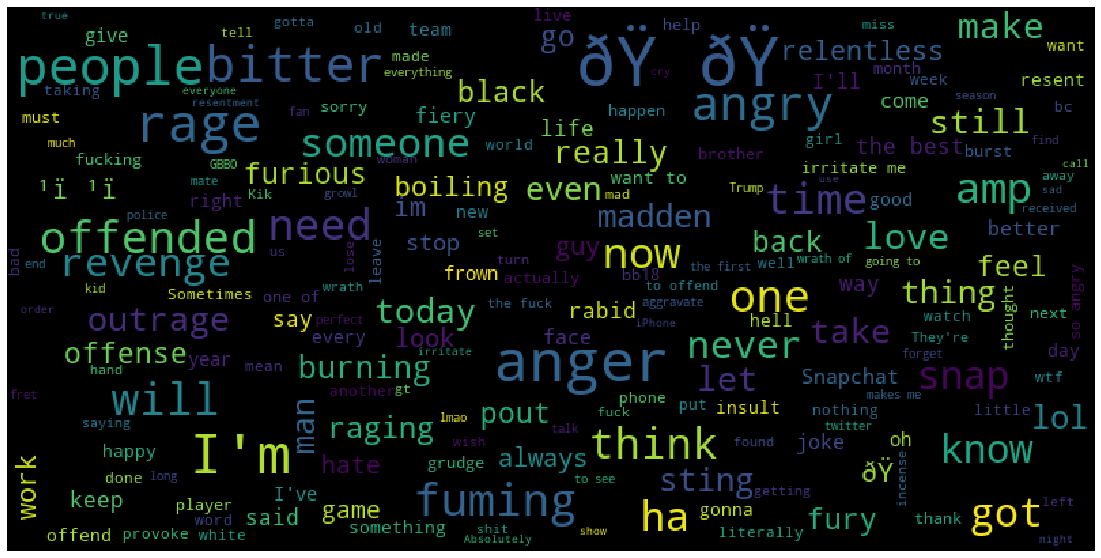

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

# Create and generate a word cloud image:
wordcloud_anger = WordCloud(max_font_size=50, background_color="black", stopwords = stopwords, width=800, 
                            height=400).generate(join_text_anger)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_anger)
plt.axis("off")
plt.show()

Semakin besar kata yang ditampilkan di gambar, semakin sering kata tersebut muncul. Dapat dilihat bahwa salah satu di antara kata yang muncul, di antaranya, terdapat emoticon.<br>

### b. Fear
Dilakukan langkah-langkah yang sama.

In [7]:
join_text_fear = " ".join(data_training[data_training['label']=="fear"]['text'].values)
counter_obj_fear = Counter(join_text_fear.split(" "))
counter_obj_fear.most_common(50)

[('the', 541),
 ('to', 489),
 ('a', 382),
 ('', 375),
 ('I', 368),
 ('is', 310),
 ('of', 306),
 ('and', 269),
 ('in', 211),
 ('you', 207),
 ('my', 169),
 ('for', 165),
 ('that', 135),
 ('it', 131),
 ('on', 126),
 ('be', 111),
 ('have', 103),
 ('was', 96),
 ('so', 94),
 ('at', 93),
 ('this', 89),
 ('but', 88),
 ('are', 88),
 ('me', 85),
 ('not', 83),
 ('like', 77),
 ('from', 75),
 ('your', 75),
 ('all', 72),
 ("I'm", 72),
 ('about', 70),
 ('just', 69),
 ('i', 68),
 ('if', 61),
 ('get', 59),
 ('can', 59),
 ('with', 59),
 ('out', 55),
 ('up', 55),
 ('an', 54),
 ('will', 53),
 ('&amp;', 53),
 ("don't", 51),
 ('The', 51),
 ('when', 49),
 ('what', 48),
 ('-', 44),
 ('we', 44),
 ("it's", 44),
 ('do', 43)]

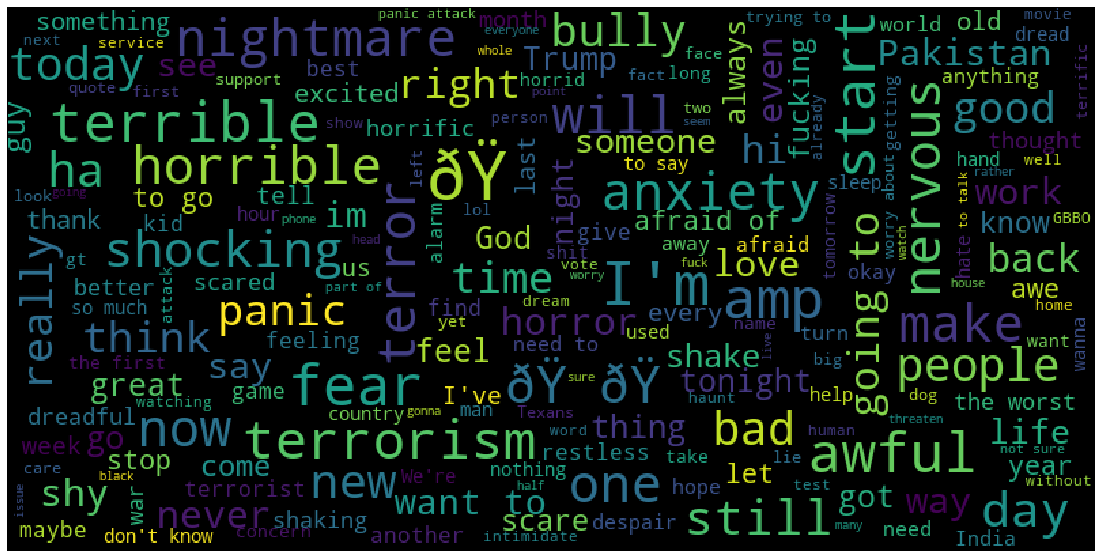

In [8]:
# Create and generate a word cloud image:
wordcloud_fear = WordCloud(max_font_size=50, background_color="black", stopwords = stopwords, width=800,
                           height=400).generate(join_text_fear)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_fear)
plt.axis("off")
plt.show()

### c. Sadness

In [9]:
join_text_sad = " ".join(data_training[data_training['label']=="sadness"]['text'].values)
counter_obj_sad = Counter(join_text_sad.split(" "))
counter_obj_sad.most_common(50)

[('the', 388),
 ('to', 316),
 ('a', 297),
 ('I', 278),
 ('and', 244),
 ('of', 191),
 ('', 173),
 ('in', 168),
 ('is', 167),
 ('for', 121),
 ('you', 116),
 ('my', 112),
 ('it', 101),
 ('that', 97),
 ('on', 96),
 ('be', 92),
 ('have', 83),
 ('with', 81),
 ('not', 75),
 ('me', 70),
 ('so', 66),
 ('but', 63),
 ('at', 61),
 ("I'm", 59),
 ('was', 54),
 ('get', 54),
 ('are', 53),
 ('this', 53),
 ('all', 51),
 ('when', 50),
 ('your', 50),
 ('will', 49),
 ('or', 45),
 ("it's", 45),
 ('&amp;', 45),
 ('just', 44),
 ('i', 44),
 ('can', 44),
 ("don't", 43),
 ('they', 41),
 ('do', 41),
 ('like', 39),
 ('as', 38),
 ('The', 38),
 ('no', 37),
 ('-', 37),
 ('he', 37),
 ('about', 36),
 ('#lost', 35),
 ('one', 33)]

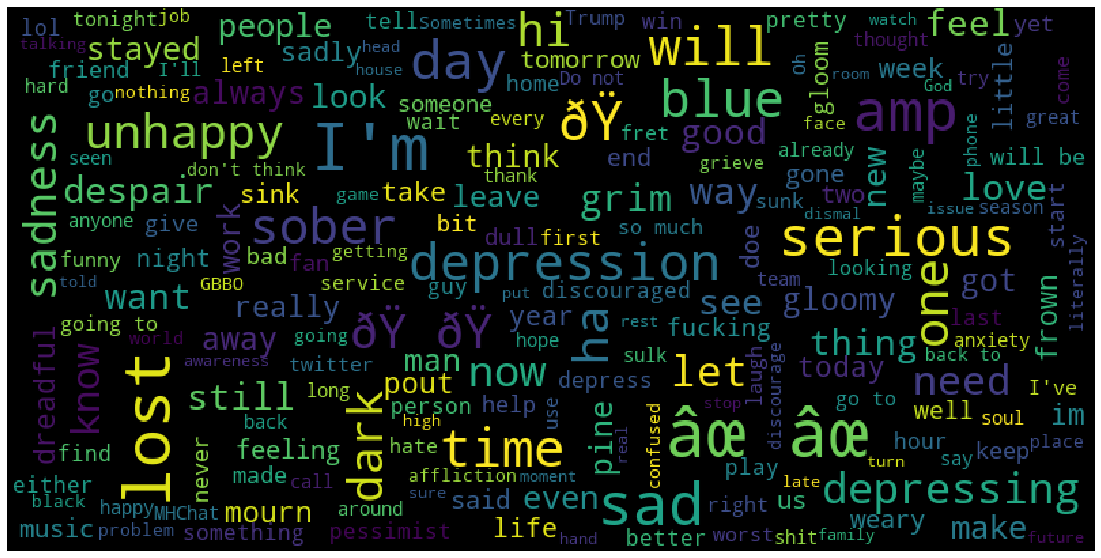

In [10]:
# Create and generate a word cloud image:
wordcloud_sad = WordCloud(max_font_size=50, background_color="black", stopwords = stopwords, width=800,
                          height=400).generate(join_text_sad)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_sad)
plt.axis("off")
plt.show()

### d. Joy

In [11]:
join_text_joy = " ".join(data_training[data_training['label']=="joy"]['text'].values)
counter_obj_joy = Counter(join_text_joy.split(" "))
counter_obj_joy.most_common(50)

[('the', 384),
 ('to', 295),
 ('a', 273),
 ('I', 237),
 ('and', 236),
 ('of', 191),
 ('', 186),
 ('is', 172),
 ('you', 149),
 ('in', 128),
 ('that', 104),
 ('this', 100),
 ('be', 98),
 ('for', 89),
 ('my', 86),
 ('with', 86),
 ('so', 80),
 ('me', 78),
 ('on', 74),
 ('by', 74),
 ('just', 73),
 ("I'm", 64),
 ('it', 64),
 ('at', 60),
 ('have', 59),
 ('amazing', 58),
 ('but', 57),
 ('was', 57),
 ('Watch', 54),
 ('live.ly', 54),
 ('broadcast', 54),
 ('your', 53),
 ('#musically', 52),
 ('not', 51),
 ('like', 51),
 ('all', 50),
 ('day', 46),
 ('&amp;', 45),
 ('about', 44),
 ('up', 42),
 ('will', 39),
 ('from', 38),
 ('as', 36),
 ('i', 34),
 ('are', 34),
 ('or', 34),
 ('The', 33),
 ('love', 32),
 ('good', 32),
 ('out', 32)]

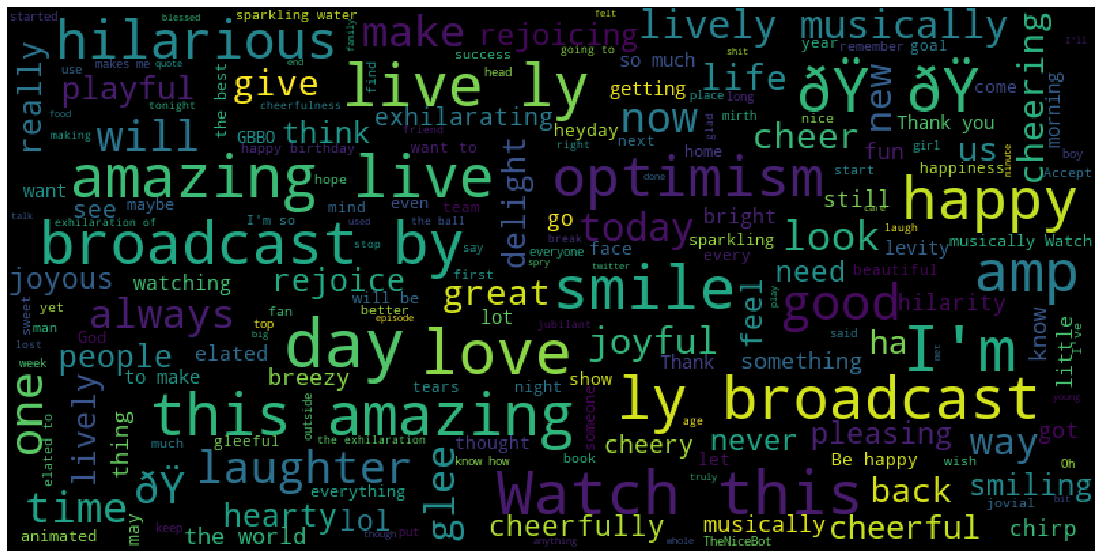

In [12]:
# Create and generate a word cloud image:
wordcloud_joy = WordCloud(max_font_size=50, background_color="black", stopwords = stopwords, width=800,
                          height=400).generate(join_text_joy)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_joy)
plt.axis("off")
plt.show()

## 3. Text preprocessing
Karena yang akan dilakukan adalah prediksi intensitas emosi, tanda baca tidak akan dihapus pada proses text processing ini. Yang dilakukan adalah menghapus penyebutan URL, penyebutan user lain (mention), dan angka. Selain itu, akan dihilangkan juga stopwords.<br>

Berikut adalah fungsi yang akan digunakan untuk melakukan cleaning data tweet. Digunakan library WordPunctTokenizer untuk melakukan tokenizer, stopwords dari NLTK untuk mendefinisikan stopwordsnya, dan re untuk membangun regex.

In [13]:
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import re

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z_0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'[0-9]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
stop_words = set(stopwords.words('english')) 

def tweet_cleaner(data_frame):
    print ("Cleaning and parsing the tweets...\n")
    clean_data = []
    for index, row in data_frame.iterrows():
        stripped = re.sub(combined_pat, '', row.text)
        lower_case = stripped.lower()
        words = tok.tokenize(lower_case)
        filtered_words = [w for w in words if not w in stop_words]
        clean_data.append((" ".join(filtered_words)).strip())
        
    print ("Done!")
    return clean_data

Setelah fungsi dibuat, dilakukan cleaning pada data setiap label. Untuk prediksi intensitas emosi, akan dibuat model yang berbeda untuk setiap label karena komposisi katanya kemungkinan berbeda juga. Dengan berbedanya komposisi kata, penilaian intensitas pun ada kemungkinan berbeda untuk setiap labelnya.

In [14]:
anger.text = pd.DataFrame(tweet_cleaner(anger))
fear.text = pd.DataFrame(tweet_cleaner(fear))
sad.text = pd.DataFrame(tweet_cleaner(sad))
joy.text = pd.DataFrame(tweet_cleaner(joy))

Cleaning and parsing the tweets...

Done!
Cleaning and parsing the tweets...

Done!
Cleaning and parsing the tweets...

Done!
Cleaning and parsing the tweets...

Done!


## 4. Training
Dalam melakukan training, digunakan training set dan development set yang sudah disatukan sebelumnya. Sebelum dibangun model, dilakukan dulu feature extraction dengan menggunakan TF-IDF. Digunakan library TfidfVectorizer dari Scikit Learn untuk melakukannya.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorTFIDF = TfidfVectorizer(max_features = 500)
xTFIDF_anger = vectorTFIDF.fit_transform(anger.text)
xTFIDF_fear = vectorTFIDF.fit_transform(fear.text)
xTFIDF_sad = vectorTFIDF.fit_transform(sad.text)
xTFIDF_joy = vectorTFIDF.fit_transform(joy.text)

Selanjutnya, baru lah dibuat model dari fitur tersebut. Dalam memprediksi intensitas emosi kali ini, digunakan algoritma regresi dengan random forest. Untuk melakukannya, digunakan library RandomForestRegressor dari Scikit Learn.

In [16]:
from sklearn.ensemble import RandomForestRegressor

regressor_anger = RandomForestRegressor(max_depth=2, random_state=0)
regressor_fear = RandomForestRegressor(max_depth=2, random_state=0)
regressor_sad = RandomForestRegressor(max_depth=2, random_state=0)
regressor_joy = RandomForestRegressor(max_depth=2, random_state=0)

# predict every label
# anger
regressor_anger.fit(xTFIDF_anger, anger.intensity)

# fear
regressor_fear.fit(xTFIDF_fear, fear.intensity)

# sad
regressor_sad.fit(xTFIDF_sad, sad.intensity)

# joy
regressor_joy.fit(xTFIDF_joy, joy.intensity)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Model untuk setiap label pun sudah terbentuk.<br>

## 5. Testing
Model sudah terbentuk, waktunya melakukan testing. Sebelumnya, testing set dibersihkan terlebih dahulu dengan fungsi yang sudah dibuat sebelumnya.

In [17]:
anger_test.text = pd.DataFrame(tweet_cleaner(anger_test))
fear_test.text = pd.DataFrame(tweet_cleaner(fear_test))
sad_test.text = pd.DataFrame(tweet_cleaner(sad_test))
joy_test.text = pd.DataFrame(tweet_cleaner(joy_test))

Cleaning and parsing the tweets...

Done!
Cleaning and parsing the tweets...

Done!
Cleaning and parsing the tweets...

Done!
Cleaning and parsing the tweets...

Done!


Kemudian, lakukan feature extraction dengan TF-IDF.

In [18]:
xTFIDF_anger_test = vectorTFIDF.fit_transform(anger_test.text)
xTFIDF_fear_test = vectorTFIDF.fit_transform(fear_test.text)
xTFIDF_sad_test = vectorTFIDF.fit_transform(sad_test.text)
xTFIDF_joy_test = vectorTFIDF.fit_transform(joy_test.text)

Setelah itu, baru lah dilakukan testing dengan model yang telah dibuat di proses training.

In [19]:
y_anger = regressor_anger.predict(xTFIDF_anger_test)
y_fear = regressor_fear.predict(xTFIDF_fear_test)
y_sad = regressor_sad.predict(xTFIDF_sad_test)
y_joy = regressor_joy.predict(xTFIDF_joy_test)

## 6. Evaluasi
Hasil testing disimpan di dalam file .txt untuk selanjutnya dihitung skor Pearson Correlation Coefficientnya menggunakan script yang ada di https://github.com/felipebravom/EmoInt.

In [20]:
anger_pred = pd.DataFrame(columns = ['id', 'text', 'label'], data = anger_test[['id', 'text', 'label']].values)
anger_pred['intensity'] = y_anger
anger_pred.to_csv('_anger_pred.txt', header=False, index=False, sep='\t', mode='a')
anger_test.to_csv('_anger_test.txt', header=False, index=False, sep='\t', mode='a')

fear_pred = pd.DataFrame(columns = ['id', 'text', 'label'], data = fear_test[['id', 'text', 'label']].values)
fear_pred['intensity'] = y_fear
fear_pred.to_csv('_fear_pred.txt', header=False, index=False, sep='\t', mode='a')
fear_test.to_csv('_fear_test.txt', header=False, index=False, sep='\t', mode='a')

sad_pred = pd.DataFrame(columns = ['id', 'text', 'label'], data = sad_test[['id', 'text', 'label']].values)
sad_pred['intensity'] = y_sad
sad_pred.to_csv('_sad_pred.txt', header=False, index=False, sep='\t', mode='a')
sad_test.to_csv('_sad_test.txt', header=False, index=False, sep='\t', mode='a')

joy_pred = pd.DataFrame(columns = ['id', 'text', 'label'], data = joy_test[['id', 'text', 'label']].values)
joy_pred['intensity'] = y_joy
joy_pred.to_csv('_joy_pred.txt', header=False, index=False, sep='\t', mode='a')
joy_test.to_csv('_joy_test.txt', header=False, index=False, sep='\t', mode='a')

Setelah itu, dihitung Pearson Correlation Coefficient dari hasil prediksi terhadap intensitas yang sebelumnya sudah diberikan kepada testing set.
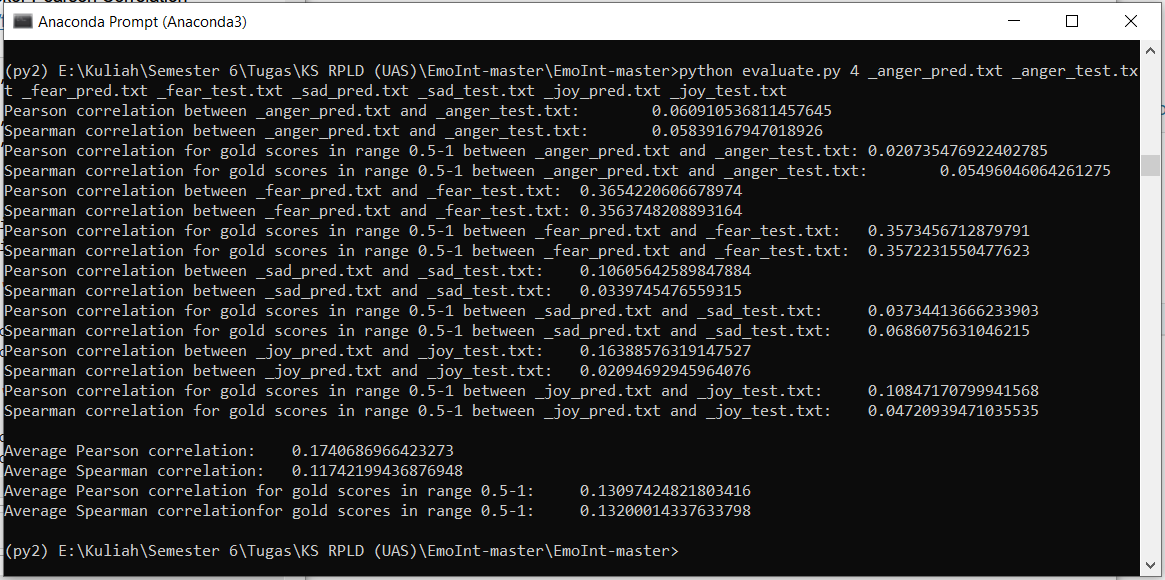<br>

Dapat dilihat bahwa skor yang dihasilkan tidak cukup baik. Setiap labelnya memiliki skor:
1. Anger: 0.06091
2. Fear: 0.36542
3. Sadness: 0.10606
4. Joy: 0.16389
Rata-rata: 0.17407

## 7. Analisa
Perbedaan skor yang diterima setiap label dapat terjadi karena perbedaan banyak training set pada setiap label. Dapat dilihat di bagian awal bahwa banyak training set setiap labelnya:
1. Anger: 941
2. Fear: 1257
3. Sadness: 860
4. Joy: 902

Data di atas menunjukkan bahwa semakin banyak training set, semakin baik juga model yang dibangun. Baikya model yang dibangun akan berakibat pada keakuratan prediksi yang dibuat. Oleh karena itu, jika dimiliki lebih banyak training set, model yang dibangun mungkin akan lebih baik dan prediksi yang dihasilkan pun lebih akurat.<br>

Ketika berbicara dengan emosi, karakter tanda baca dan emoticon menjadi hal yang berarti. Ada kemungkinan keberadaannya menunjukkan emosi yang tinggi, ada pula kemungkinan sebaliknya. Dengan begitu, pembobotan fitur emoticon dan tanda baca sebenarnya bisa jadi berbeda dengan pembobotan karakter atau kata lainnya. Pada prediksi ini, emoticon dan tanda baca masih diperlakukan sama dan dianggap satu fitur dengan karakter atau kata lain. Mungkin hal ini juga yang menyebabkan skor Pearson Correlation Coefficient yang didapat oleh prediksi ini tidak tinggi.<br>

Digunakannya algoritma regresi adalah karena yang diprediksi merupakan nilai real dan bukan klasifikasi. Untuk itu, digunakan algoritma regresi Random Forest karena hasil yang diperoleh lebih baik daripada jika digunakan Linear Regression dan regresi dengan SVM. Begitu juga dengan ekstraksi fitur dengan TF-IDF, dipilihnya cara tersebut adalah karena hasil yang diperoleh ketika ekstraksi fitur dengan Bag of Words tidak lebih baik.<br>

## 8. Implementasi Prediksi
Walaupun belum sempurna, prediksi ini sudah dapat diimplementasikan ke data set yang belum diketahui intensitasnya. Pada halaman http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html, terdapat juga data set yang belum memiliki nilai intensitas. Akan dicoba untuk mengimplementasikan prediksi ini pada data set tersebut.

In [21]:
# import data
anger_ = pd.read_csv('anger-test-emp.txt', header=None, sep="\t", names= cols, index_col=0)
fear_ = pd.read_csv('fear-test-emp.txt', header=None, sep="\t", names= cols, index_col=0)
sad_ = pd.read_csv('sadness-test-emp.txt', header=None, sep="\t", names= cols, index_col=0)
joy_ = pd.read_csv('joy-test-emp.txt', header=None, sep="\t", names= cols, index_col=0)

# reset the index
anger_.reset_index(inplace=True)
fear_.reset_index(inplace=True)
sad_.reset_index(inplace=True)
joy_.reset_index(inplace=True)

# cleaning
anger_.text = pd.DataFrame(tweet_cleaner(anger_))
fear_.text = pd.DataFrame(tweet_cleaner(fear_))
sad_.text = pd.DataFrame(tweet_cleaner(sad_))
joy_.text = pd.DataFrame(tweet_cleaner(joy_))

# feature extraction
xTFIDF_anger_ = vectorTFIDF.fit_transform(anger_.text)
xTFIDF_fear_ = vectorTFIDF.fit_transform(fear_.text)
xTFIDF_sad_ = vectorTFIDF.fit_transform(sad_.text)
xTFIDF_joy_ = vectorTFIDF.fit_transform(joy_.text)

# predict
y_anger_ = regressor_anger.predict(xTFIDF_anger_)
y_fear_ = regressor_fear.predict(xTFIDF_fear_)
y_sad_ = regressor_sad.predict(xTFIDF_sad_)
y_joy_ = regressor_joy.predict(xTFIDF_joy_)

anger_['intensity'] = y_anger_
fear_['intensity'] = y_fear_
sad_['intensity'] = y_sad_
joy_['intensity'] = y_joy_

Cleaning and parsing the tweets...

Done!
Cleaning and parsing the tweets...

Done!
Cleaning and parsing the tweets...

Done!
Cleaning and parsing the tweets...

Done!


In [22]:
print(anger_.head(10))

      id                                               text  label  intensity
0  10941  point today someone says something remotely ki...  anger   0.483005
1  10942               ' game day !!!! minus : # relentless  anger   0.483005
2  10943  game pissed game year . blood boiling ! time t...  anger   0.483005
3  10944       ' found ' candice candace . pout likes ðÿ ˜  anger   0.470597
4  10945        ' come mum ' th k tweets ðÿ ™ ˆ # soreloser  anger   0.483005
5  10946  ' come mum ' th k tweets ðÿ ™ ˆ # bitter # sor...  anger   0.483005
6  10947            wanna go home focus game . ' wanna rage  anger   0.483005
7  10948  ' disconnected whilst holiday ðÿ ˜¤ ' move hou...  anger   0.696822
8  10949  ' disconnected whilst holiday ðÿ ˜¤ ' move hou...  anger   0.483005
9  10950             wanna see smile ' wanna see make frown  anger   0.483005


In [23]:
print(fear_.head(10))

      id                                               text label  intensity
0  21257  # matthew ; -\ ncould somebody shoot # video ?...  fear   0.478798
1  21258  really sucks typing mobile device always horri...  fear   0.478798
2  21259      # afraid # quiet ones ones actually # think .  fear   0.478798
3  21260             ' horrible person gag see people quote  fear   0.478798
4  21261  fear usually need .' ~ tim ferriss # inspiring...  fear   0.478798
5  21262  fear usually need .' ~ tim ferriss # inspiring...  fear   0.478798
6  21263  pedicure supposed nice honestly ' nervous rn f...  fear   0.751003
7  21264  us need band together apart # nevertrump promo...  fear   0.478798
8  21265  us need band together apart # nevertrump promo...  fear   0.478798
9  21266  shamefull , unequal , dangerous worrying world...  fear   0.478798


In [24]:
print(sad_.head(10))

      id                                               text    label  \
0  40860  teens sons left car get haircuts . ' praying s...  sadness   
1  40861  teens sons left car get haircuts . ' praying s...  sadness   
2  40862  hartramsey ' suplift ' still discouraged means...  sadness   
3  40863                 nearly dropped phone sink hahahaha  sadness   
4  40864  whenever ' feeling sad listen monsta x hug ted...  sadness   
5  40865       ' found ' candice candace . pout likes ðÿ ˜  sadness   
6  40866  concorde lounge terminal jfk . saddened say , ...  sadness   
7  40867  # facebook # depressing without even . two app...  sadness   
8  40868  btw , offended policy wonks , h one real propo...  sadness   
9  40869  believe work meaningful ; clients would agree ...  sadness   

   intensity  
0   0.475679  
1   0.475679  
2   0.475679  
3   0.475679  
4   0.475679  
5   0.475679  
6   0.475679  
7   0.475679  
8   0.475679  
9   0.471320  


In [25]:
print(joy_.head(10))

      id                                               text label  intensity
0  30902  must knowing # blithe means ( adj .) happy , c...   joy   0.470575
1  30903  old saying ' # smile shared one gained another...   joy   0.470575
2  30904  bridget jones ' baby bloody hilarious ðÿ ˜… # ...   joy   0.470575
3  30905                 sparkling water makes life sparkly   joy   0.470575
4  30906  ' tired everybody telling chill everythings ok...   joy   0.470575
5  30907                             # gbbo cheer â ˜ ºï ¸   joy   0.470575
6  30908  & amp ; much hate dude cheat , women forego pl...   joy   0.470575
7  30909  happy birthday jin young !!!!!! # princejinyou...   joy   0.470575
8  30910  happy birthday jin young !!!!!! # princejinyou...   joy   0.470575
9  30911  race advances extra achievements individual . ...   joy   0.470575
